In [ ]:
#Social_Network_Ads.csv

**Importing the libraries**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

**Importing the dataset**

In [2]:
df = pd.read_csv('Social_Network_Ads.csv')

In [3]:
gender_encode = pd.get_dummies(df.Gender)
df = pd.concat([df, gender_encode], axis = 1)
df.drop(['Gender', 'User ID'], axis = 1, inplace = True)

In [4]:
df['Purchased'] = df['Purchased'].map({0 : 'False', 1 : 'True'})

**Splitting the dataset into the Training set and Test set**

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
X = df.drop(['Purchased'], axis = 1)

y = df[['Purchased']]

names = X.columns

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

**Feature Scaling**

In [7]:
from sklearn.preprocessing import StandardScaler

In [8]:
sc = StandardScaler()

In [9]:
X_train = sc.fit_transform(X_train)

X_test = sc.fit_transform(X_test)

X_train = pd.DataFrame(X_train, columns = [names])
X_test = pd.DataFrame(X_test, columns = [names])

**Fitting Random Forest to the Training set**

In [10]:
from sklearn.ensemble import RandomForestClassifier

In [38]:
rfc = RandomForestClassifier(n_estimators = 5, max_depth = 3)

In [41]:
rfc.fit(X_train, y_train)

C:\Users\wiki\AppData\Local\Temp\ipykernel_9116\1542427849.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc.fit(X_train, y_train)


RandomForestClassifier(max_depth=3, n_estimators=5)

**Predicting the Test set results**

In [42]:
rfc_result = rfc.predict(X_test)

**Making the Confusion Matrix**

In [14]:
from sklearn.metrics import plot_confusion_matrix

C:\Users\wiki\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


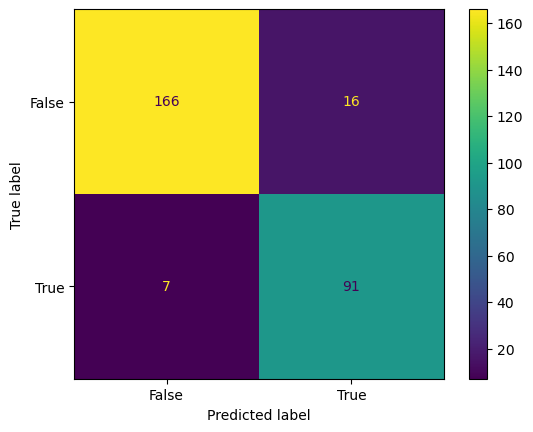

In [43]:
plot_confusion_matrix(rfc, X_train, y_train)

**Visualising the Training set results**

In [22]:
target = list(df['Purchased'].unique())

feature_names = list(X.columns)

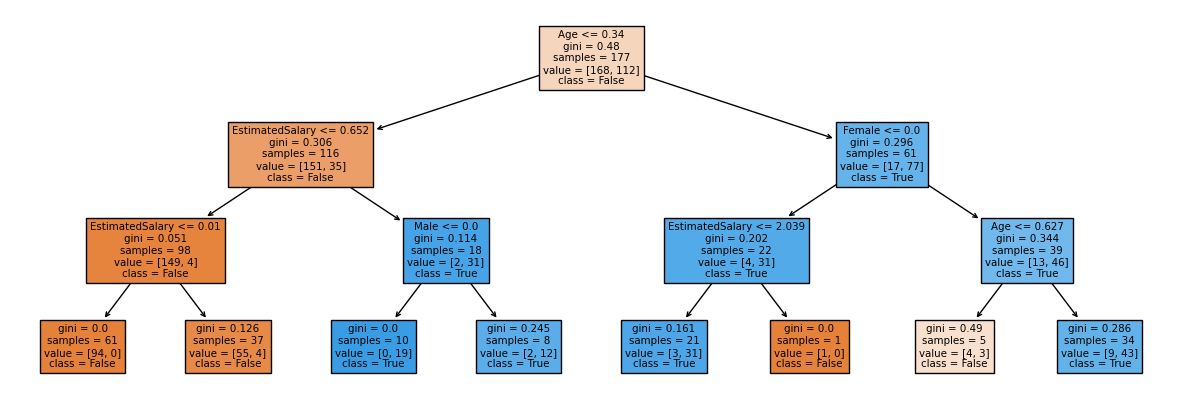

In [46]:
fig, axes = plt.subplots(figsize = (15,5))
tree.plot_tree(rfc.estimators_[0],
               feature_names = feature_names, 
               class_names = target,
               filled = True);
fig.savefig('rf_individualtree.png')

**Visualising the Test set results**

C:\Users\wiki\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


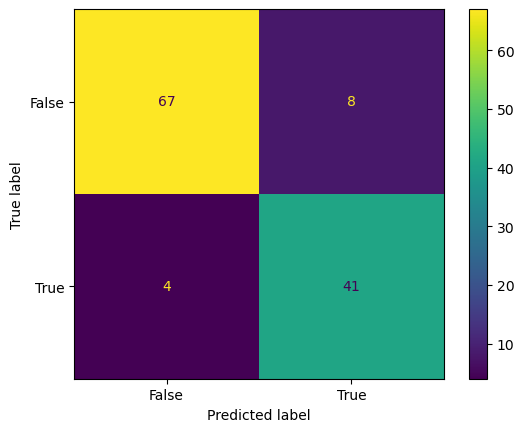

In [47]:
plot_confusion_matrix(rfc, X_test, y_test)

In [48]:
rfc.fit(X_test, y_test)

C:\Users\wiki\AppData\Local\Temp\ipykernel_9116\3635597816.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc.fit(X_test, y_test)


RandomForestClassifier(max_depth=3, n_estimators=5)

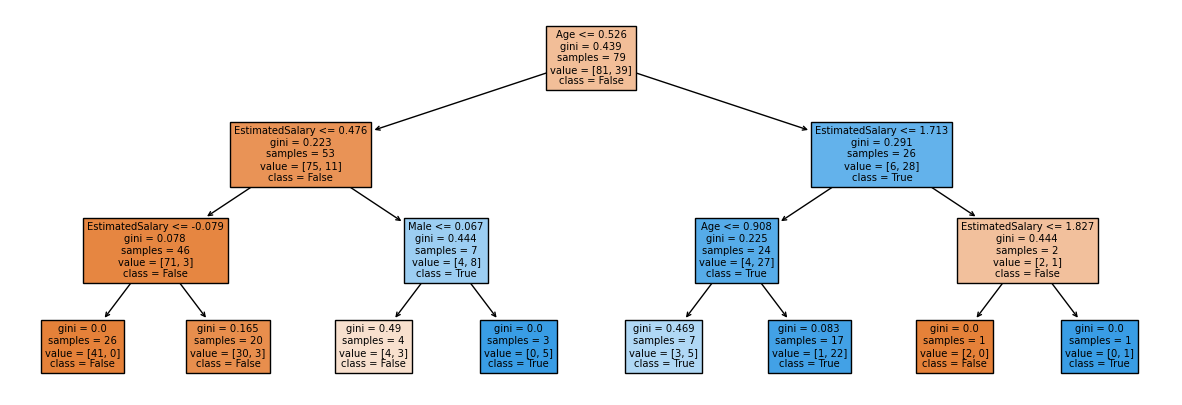

In [49]:
fig, axes = plt.subplots(figsize = (15,5))
tree.plot_tree(rfc.estimators_[0],
               feature_names = feature_names, 
               class_names = target,
               filled = True);
fig.savefig('rf_individualtree.png')